In [1]:
from pyntcloud import PyntCloud
from pyntcloud.io import bin as io_bin
import numpy as np
import pandas as pd
from pythreejs import *  
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text, Output, VBox
from traitlets import link, dlink
import glob
from check import ROI
import json

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def createBBox(bounding_box,C1,C2,C3,C4,C5,C6,C7,C8,color="yellow"):
    bounding_box.append({"color":color, "vertices":[C1,C2,C3,C4,C1]})
    bounding_box.append({"color":color, "vertices":[C1,C4,C8,C5,C1]})
    bounding_box.append({"color":color, "vertices":[C1,C2,C6,C5,C1]})
    bounding_box.append({"color":color, "vertices":[C2,C6,C7,C3,C2]})
    bounding_box.append({"color":color, "vertices":[C3,C7,C8,C4,C3]})
    return bounding_box

with open('lidar_config.txt') as f:
    lidar_config = json.load(f)
    index = len(lidar_config['lidar'])
    
home = [0,0,2.8]
CLOUD = pd.DataFrame(columns=['x','y','z'])
individual_points = []

lidar_num = index;
for i in range(lidar_num):
    pointfiles = glob.glob("convert_image/{}/Pointclouds/*".format(i))     # pointcloud files
    coord = lidar_config['lidar'][i]['location']

    num = 1
    labelfiles = glob.glob("convert_image/{}/Labels/*".format(i))
    curr_boxes = np.load(labelfiles[num])                   # bounding box vertex location files
    
    if(i==0):
        boxes_inside = []
        for box in curr_boxes:
            if(np.abs(box[0,0]) < ROI/2 and np.abs(box[0,1]) < ROI/2):
                boxes_inside.append(box)
        curr_boxes = boxes_inside
        curr_boxes = curr_boxes[:-1]

        boxes_gt = list()
        for each in curr_boxes:
            each = each.tolist()
            boxes_gt = createBBox(boxes_gt,each[0],each[1],each[2],each[3],each[4],each[5],each[6],each[7])

    points_numpy = np.loadtxt(pointfiles[num])         # specify pointcloud file
    new = np.random.random((len(points_numpy),3))
    points_numpy = np.hstack((points_numpy,new))
    points = pd.DataFrame(data=points_numpy,columns=['x', 'y', 'z','red','green','blue'])
    points.iloc[:,0:3] = points.iloc[:,0:3] - (np.asarray(coord) - np.asarray(home))
    individual_points.append(len(points))
    CLOUD = CLOUD.append(points)

cloud = PyntCloud(CLOUD)
colors = [np.array([0,0,255], dtype=np.uint8),np.array([0,255,0],dtype=np.uint8)]
for i in range(1,lidar_num+1):
    for j in range(individual_points[i-1]):
        if(i==1):
            cloud.points.loc[j,0:3] = colors[i-1]
        else:
            cloud.points.iloc[individual_points[i-2]+j-2,0:3] = colors[i-1]

IndexError: list index out of range

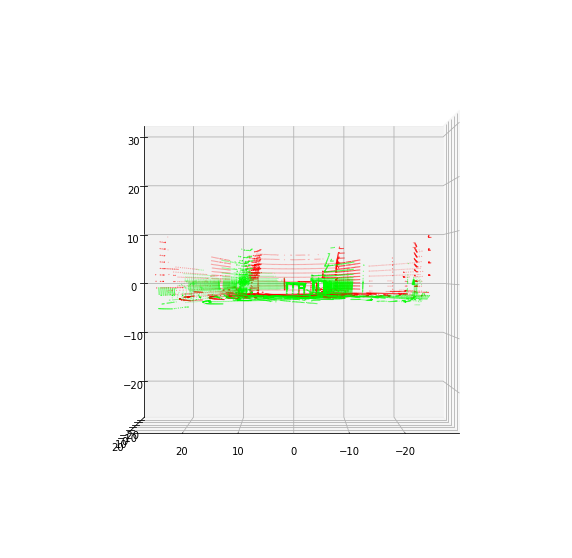

In [12]:
cloud.plot(initial_point_size=0.02, polylines=boxes_gt)
# lidar_point_cloud = PyntCloud.from_file("convert_image/lidar/{}.ply".format(num))
# lidar_point_cloud.points = -5*lidar_point_cloud.points
# lidar_point_cloud.plot(initial_point_size=0.02)

In [14]:
np.load("0_datacollected_2019-13-10-29-43/000000.npy")

array(None, dtype=object)

In [9]:
import csv
import json
import pandas as pd

data = {}
data['lidar'] = []

# data['lidar'].append({
#     'location': [0,0,2.8,0,0,0],
#     'angles': [-25,-1,-1.667,-15.639,-11.31,0,-0.667,-8.843,-7.254,0.333,-0.333,-6.148,-5.333,
#             1.333,0.667,-4,-4.667,1.667,1,-3.667,-3.333,3.333,2.333,-2.667 ,-3,7,4.667,-2.333 ,-2,15,10.333,-1.333],
#     'resolution': 0.2
# })
data['lidar'].append({
    'location': [0,-1,2.8],
    'angles': [-15,-13,-11,-9,-7,-5,-3,-1,1,3,5,7,9,11,13,15],
    'resolution': 0.4
})
data['lidar'].append({
    'location': [0,1,2.8],
    'angles': [-15,-13,-11,-9,-7,-5,-3,-1,1,3,5,7,9,11,13,15]
#     [-25,-1,-1.667,-15.639,-11.31,0,-0.667,-8.843,-7.254,0.333,-0.333,-6.148,-5.333,
#             1.333,0.667,-4,-4.667,1.667,1,-3.667,-3.333,3.333,2.333,-2.667 ,-3,7,4.667,-2.333 ,-2,15,10.333,-1.333]
    'resolution': 0.4
})

with open('lidar_config.txt', 'w') as outfile:
    json.dump(data, outfile)

SyntaxError: invalid syntax (<ipython-input-9-baee3af68635>, line 24)

In [10]:
np.shape(curr_boxes)

(101, 8, 3)

In [3]:
np.load("1_datacollected_labels_2019-14-03-37-07/000371.npy")

array([[[-116.63621294,   82.75711082,   -3.06777236],
        [-115.18833617,   78.38180531,   -2.53721692],
        [-117.33259146,   77.67017472,   -2.55414978],
        ...,
        [-115.26065067,   78.56003213,   -0.87009753],
        [-117.40490596,   77.84840154,   -0.8870304 ],
        [-118.85278273,   82.22370704,   -1.41758584]],

       [[-250.28298471,  -50.51711439,   -2.87252932],
        [-251.05254181,  -48.29652039,   -2.88087296],
        [-250.32855148,  -48.04562093,   -2.88159698],
        ...,
        [-251.05293655,  -48.29115739,   -1.41714368],
        [-250.32894623,  -48.04025793,   -1.41786771],
        [-249.55938914,  -50.26085193,   -1.40952407]],

       [[  17.85663934, -286.0792691 ,   -5.14012842],
        [  13.54962221, -287.80160812,   -5.20559785],
        [  12.71047094, -285.70402898,   -5.18273984],
        ...,
        [  13.53393783, -287.82616767,   -3.52767292],
        [  12.69478656, -285.72858853,   -3.50481491],
        [  17.00180369